In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/elena/Projects/HR_Analysis/.venv/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### Load data

In [2]:
# test set does not containt the response variable 'target', thus we will only work with the train set
df = pd.read_csv("data/aug_train.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# Business Understanding

- Who is participating in the training - gender overview
    - How many of them are looking for a new job
- Do experienced candidates tend to look for a new job?
- Does the educational background matter?
- Did candidates work before joining the training?
- What is the City Development Index? Does it matter here?


The response variable 'target' has two values; 1 and 0. We add 'target_new' and replace 1 with 'looking'n 0 with 'not looking'

In [3]:
df["target_new"] = df["target"]
df['target_new'] = df['target_new'].replace(1,"looking")
df['target_new'] = df['target_new'].replace(0,"not_looking")

For now we will the missing values with 'unkown' 

In [4]:
df = df.fillna("unkown")

# Data Understanding 

Who is participating in the training - gender overview. How many of them are looking for a new job

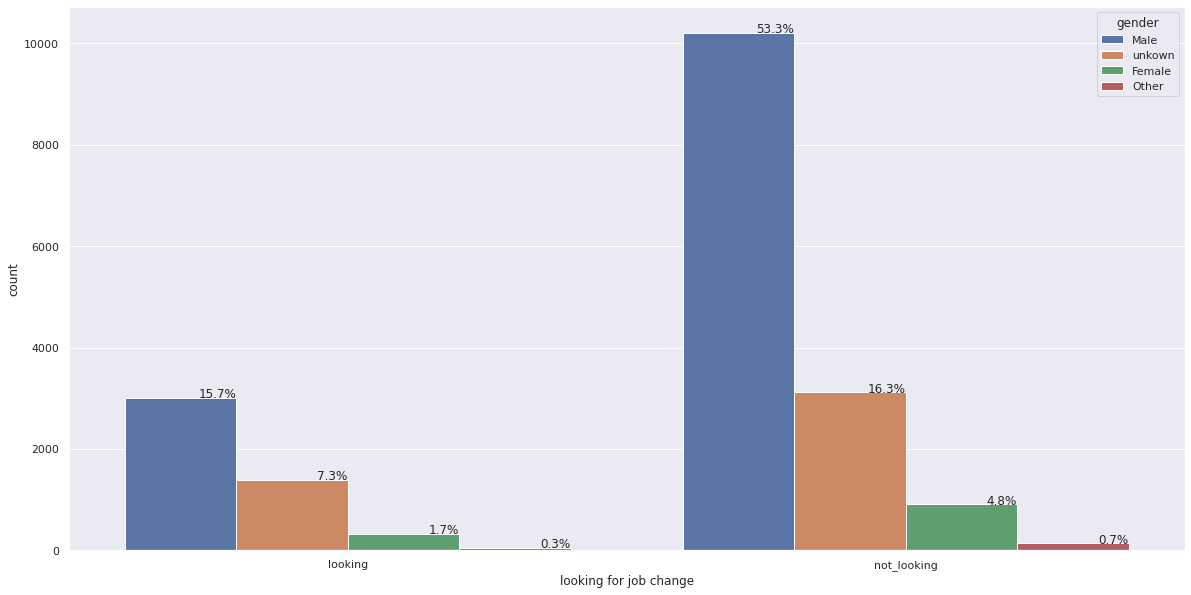

In [5]:
sns.set(rc={'figure.figsize':(20,10)})

ax = sns.countplot(x="target_new",data=df, hue="gender")
total =float(len(df))

plt.xlabel("looking for job change")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.savefig('blog/gender_overview.png')
plt.show()

In [6]:
target_count = df.target.value_counts()
print('Class 0:', target_count[0], '%', round((target_count[0]/target_count.sum())*100,2))
print('Class 1:', target_count[1], '%', round((target_count[1]/target_count.sum())*100,2))
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 14381 % 75.07
Class 1: 4777 % 24.93
Proportion: 3.01 : 1


Do experienced candidates tend to look for a new job?

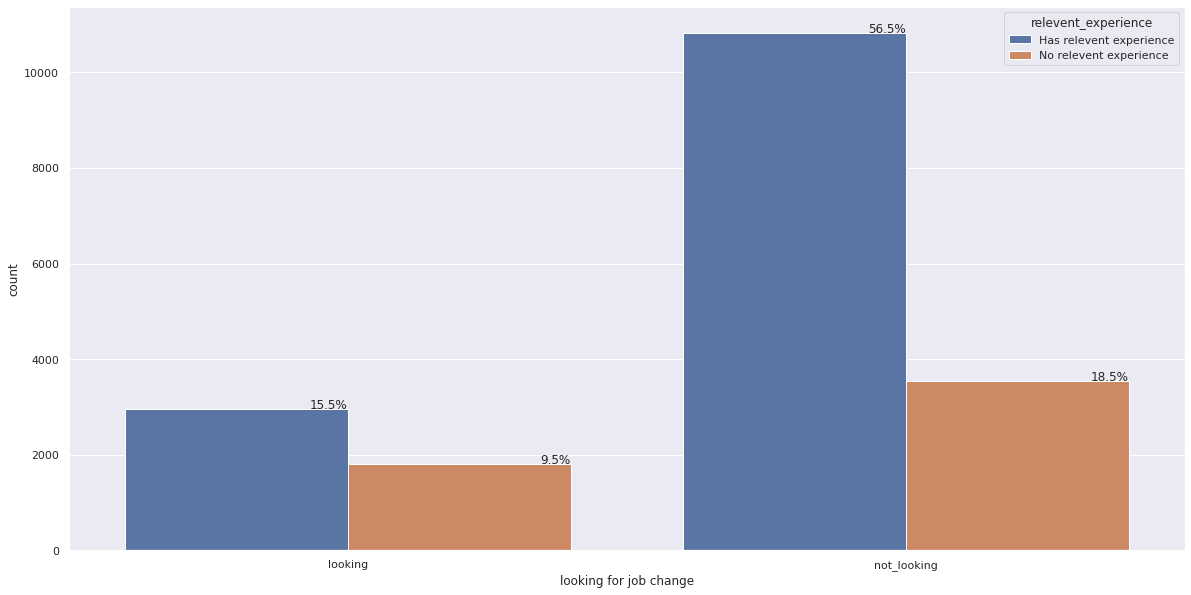

<Figure size 1080x1800 with 0 Axes>

In [7]:
ax = sns.countplot(x="target_new",data=df, hue="relevent_experience")
total =float(len(df))

plt.xlabel("looking for job change")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.figure(figsize=(15,25))
plt.savefig("blog/relevant_experience.png")
plt.show()

Does the educational background matter?

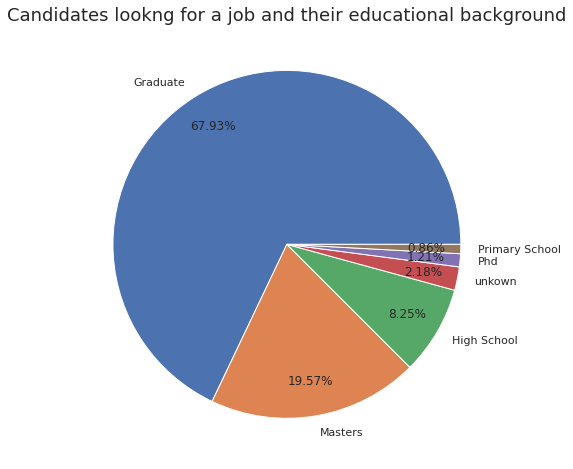

In [8]:
education_level = df[df['target'] == 1]['education_level']
values = education_level.value_counts()
labels = values.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = values, labels = labels , autopct="%.2f%%",pctdistance=0.8)
plt.title('Candidates lookng for a job and their educational background', fontsize=18);
plt.savefig("blog/education_target1.png")
plt.show()

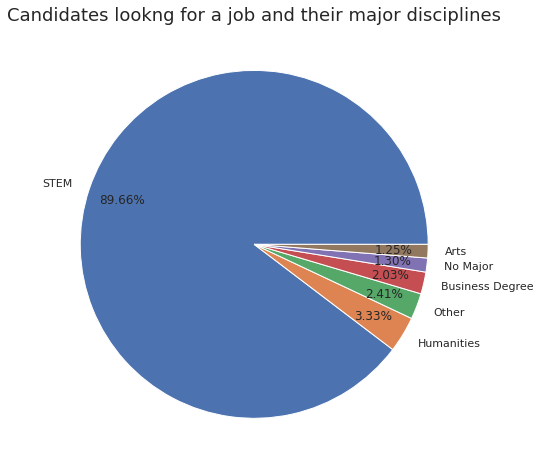

In [12]:
major_discipline = df[df['target'] == 1]['major_discipline']
values = major_discipline.value_counts()
labels = values.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = values, labels = labels , autopct="%.2f%%",pctdistance=0.8)
plt.title('Candidates lookng for a job and their major disciplines', fontsize=18)
plt.savefig("blog/major_discipline_target1.png")
plt.show()

Did candidates work before joining the training?

In [9]:
df["last_new_job"].unique()

array(['1', '>4', 'never', '4', '3', '2', 'unkown'], dtype=object)

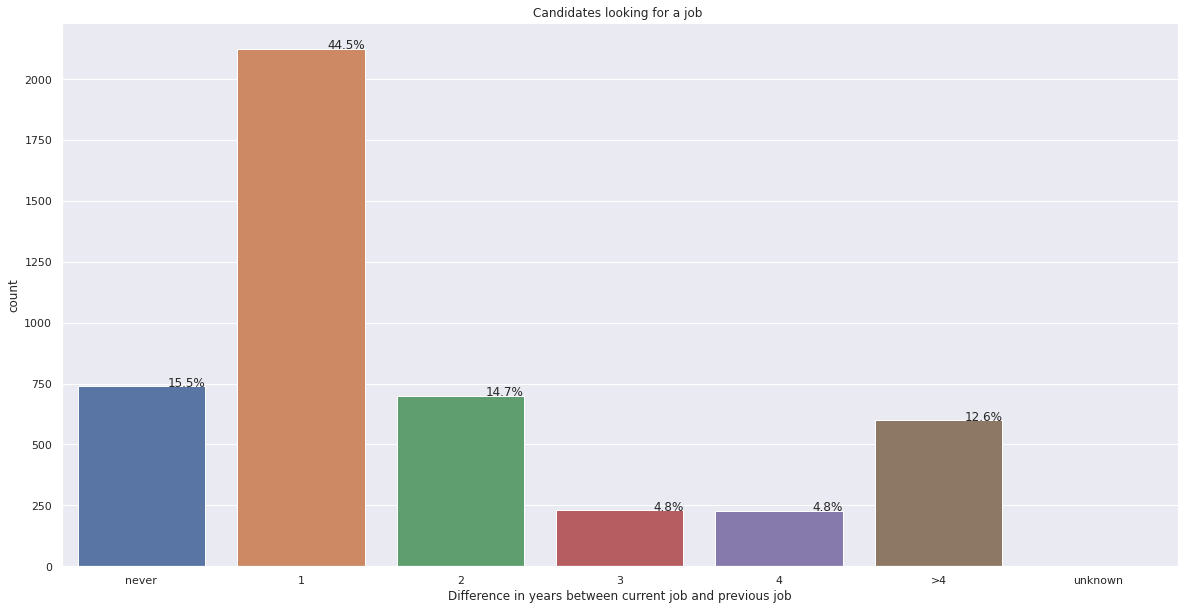

In [10]:
order = ['never', '1', '2', '3', '4', '>4', 'unknown']

ax = sns.countplot(x="last_new_job",data=df[df['target']==1], order=order)
total_1 =float(len(df[df['target']==1]))
plt.title("Candidates looking for a job ")
plt.xlabel("Difference in years between current job and previous job")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.savefig('blog/last_new_job.png')
plt.show()

In [11]:
df.experience.unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', 'unkown'],
      dtype=object)

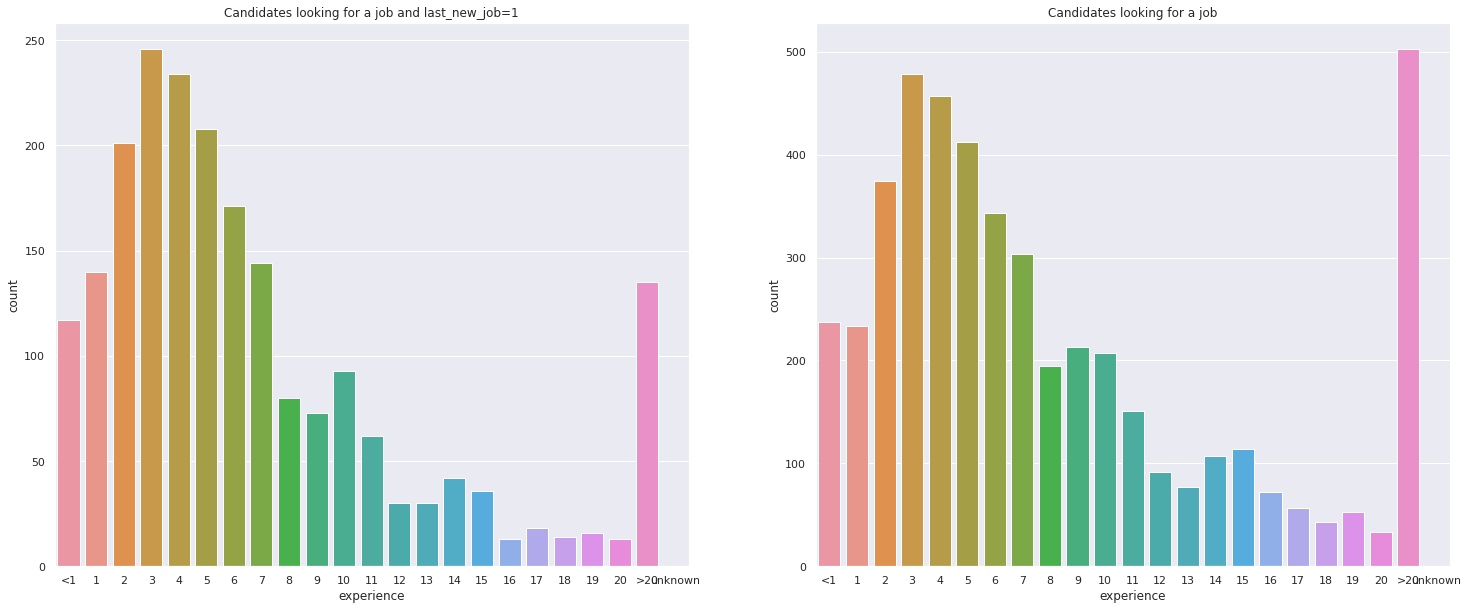

In [12]:
order2=['<1', '1', '2', '3','4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20','unknown']

df1=df[df['target']==1]

fig, axs = plt.subplots(1, 2,figsize=(25,10))

sns.countplot(x="experience",data=df1[df1['last_new_job']=='1'], order=order2, ax=axs[0])
axs[0].set_title('Candidates looking for a job and last_new_job=1')
sns.countplot(x="experience",data=df[df['target']==1], order=order2, ax=axs[1])
axs[1].set_title('Candidates looking for a job')
plt.savefig('blog/experience1.png')
plt.show()

What is the City Development Index? Does it matter here?

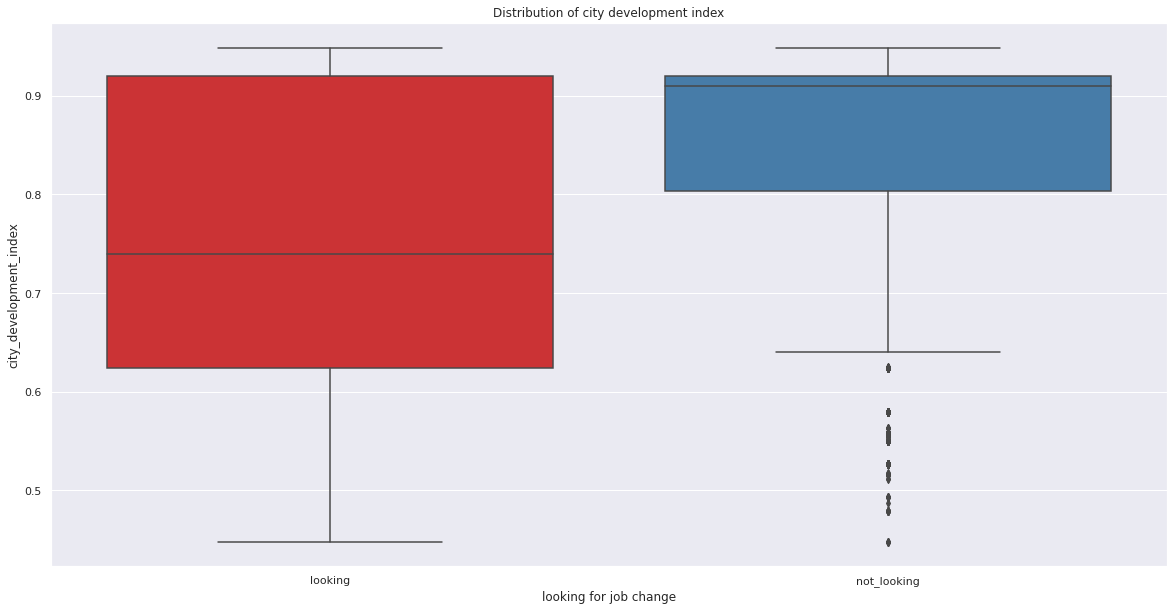

In [13]:
sns.boxplot(x="target_new",y="city_development_index",data=df,palette="Set1")
plt.title("Distribution of city development index")
plt.xlabel("looking for job change")
plt.savefig('blog/cdi.png')
plt.show()

In [14]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df["target"], df["city_development_index"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.342


# Prepare Data

Overview over which features are numerical and which are categorical, as well as the number of unique values and missing values

In [15]:
df = df.drop('target_new', axis=1)

In [16]:
pd.concat([ df.dtypes, pd.Series([df[i].unique().shape[0] for i in df.isnull().sum().index], index=df.isnull().sum().index), df.isnull().sum(), pd.Series([round((i/df.shape[0])*100,2) for i in df.isnull().sum()], index=df.isnull().sum().index)], axis=1, keys=["dtypes","unique values", "isnull sum", "isnull %"])

,dtypes,unique values,isnull sum,isnull %
enrollee_id,int64,19158,0,0.0
city,object,123,0,0.0
city_development_index,float64,93,0,0.0
gender,object,4,0,0.0
relevent_experience,object,2,0,0.0
enrolled_university,object,4,0,0.0
education_level,object,6,0,0.0
major_discipline,object,7,0,0.0
experience,object,23,0,0.0
company_size,object,9,0,0.0


Imbalance dataset

Proportion: 3.01 : 1


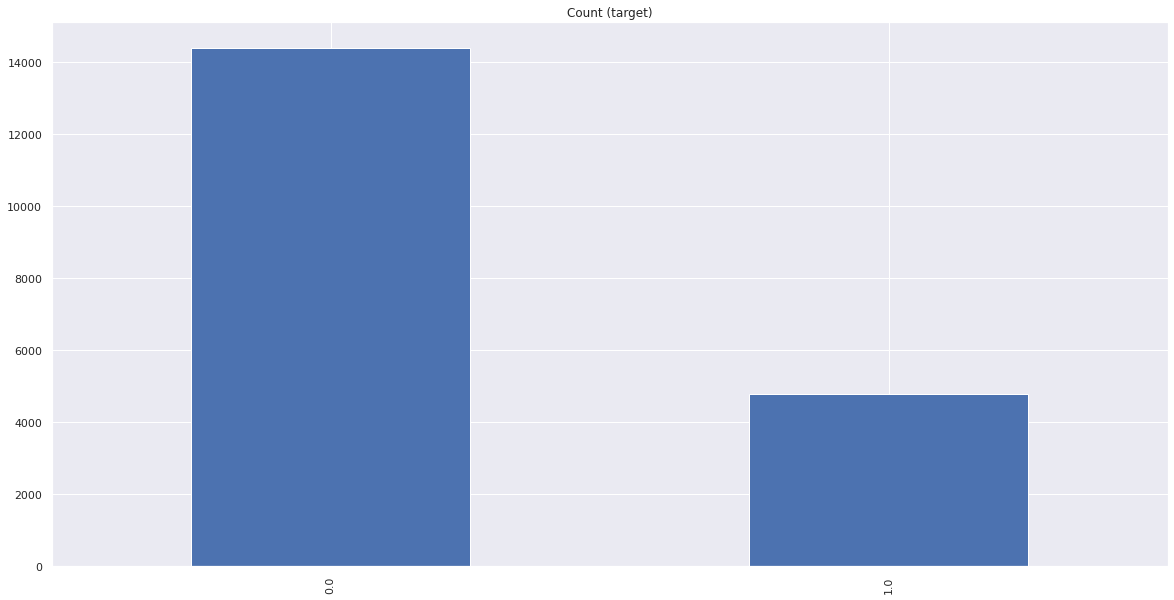

In [18]:
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

We see right away that we can make the feature city numerical by removing the string "city_"

In [19]:
df['city'] = df['city'].apply(lambda x: x.split('_')[1])
df['city'] = df['city'].astype(int)

Features with missing values less then 3%, i.e. enrolled_university, education_level, experience, last_new_job, will be imputed with the 
most frequent value

In [27]:
cols_fill_mode = ["enrolled_university", "education_level", "experience", "last_new_job"]

for col in cols_fill_mode:
    df[col] = df[col].replace('unkown',df[col].mode()[0])

 We can first do some preproccessing by just looking at the unique values and manually replacing some of the categorical features

In [21]:
df['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [22]:
df['relevent_experience'] = df['relevent_experience'].replace("Has relevent experience",1)
df['relevent_experience'] = df['relevent_experience'].replace("No relevent experience",0)

In [23]:
df['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', 'unkown', 'Part time course'],
      dtype=object)

In [24]:
df['enrolled_university'] = df['enrolled_university'].replace("Full time course",1)
df['enrolled_university'] = df['enrolled_university'].replace("no_enrollment",0)
df['enrolled_university'] = df['enrolled_university'].replace("Part time course",0.5)

In [30]:
df.experience.unique()

array([21, 15,  5,  0, 11, 13,  7, 17,  2, 16,  1,  4, 10, 14, 18, 19, 12,
        3,  6,  9,  8, 20])

In [28]:
df['experience'] = df['experience'].replace("<1","0")
df['experience'] = df['experience'].replace(">20","21")
df['experience'] = df['experience'].astype(int)

In [29]:
df.company_size.unique()

array(['unkown', '50-99', '<10', '10000+', '5000-9999', '1000-4999',
       '10/49', '100-500', '500-999'], dtype=object)

In [31]:
df['company_size'] = df['company_size'].replace("10/49","10-49")
df['company_size'] = df['company_size'].replace("<10","1-9")
df['company_size'] = df['company_size'].replace("10000+","10000")

In [32]:
df.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

In [33]:
df['last_new_job'] = df['last_new_job'].replace(">4","5")
df['last_new_job'] = df['last_new_job'].replace("never","0")
df['last_new_job'] = df['last_new_job'].astype(int)

In [35]:
df.isnull().any()

enrollee_id               False
city                      False
city_development_index    False
gender                    False
relevent_experience       False
enrolled_university       False
education_level           False
major_discipline          False
experience                False
company_size              False
company_type              False
last_new_job              False
training_hours            False
target                    False
dtype: bool

Missing values with 3% or less where replaced by the most frequent value. The other missing values got labeled as 'unkown' 

In [42]:
df_non_missing = df[(df != 'unkown').all(axis=1)]
print("if we remove the remaining missing values we will loose {}% of the data".format(round((df_non_missing.shape[0] / df.shape[0])*100),2))

if we remove the remaining missing values we will loose 47% of the data


In [43]:
df.to_pickle("data/df_no_missing_values.pkl")

Imputing for categorical features with Labelencoder

In [45]:
from sklearn.preprocessing import LabelEncoder 

df_le=df.apply(LabelEncoder().fit_transform)
df_le.to_pickle("data/df_le.pkl")

In [46]:
df_le.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5018,73,85,1,1,0,0,5,21,8,6,1,35,1
1,16986,27,48,1,0,0,0,5,15,5,5,5,46,0
2,6499,14,14,3,0,2,0,5,5,8,6,0,82,0
3,19067,81,52,3,0,0,0,1,0,8,5,0,51,1
4,358,113,45,1,1,0,2,5,21,5,1,4,7,0


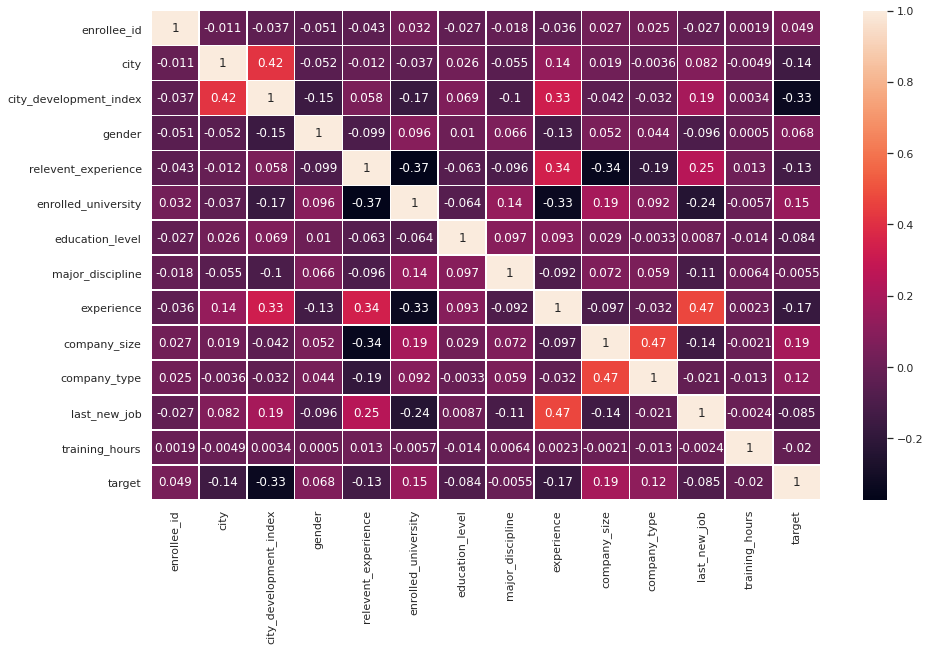

In [47]:
plt.subplots(figsize=(15, 9))
cor = df_le.corr()
sns.heatmap(cor, annot=True, linewidths=.5)
plt.show()

# Modelling 

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE

In [50]:
df = pd.read_pickle("data/df_le.pkl")

X = df.drop("target", axis=1)
y = df["target"]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13410, 13), (5748, 13), (13410,), (5748,))

Applying 3 ml models 

In [61]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
clf_list = [log_clf, rnd_clf, svm_clf]

def ml_clf(X_train, y_train, X_test, y_test, clf_list=clf_list):
  score=[]
  name=[]
  score_frame=pd.DataFrame()
  for clf in clf_list:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # adding to the lists
    score.append(round(accuracy_score(y_test, y_pred),2))
    name.append(clf.__class__.__name__)
  score_frame["name"]=name
  score_frame["score"]=score
  return score_frame.sort_values(by=["score"])

In [62]:
ml_clf(X_train, y_train, X_test, y_test)

/home/elena/Projects/HR_Analysis/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,name,score
2,SVC,0.75
0,LogisticRegression,0.77
1,RandomForestClassifier,0.78


In [63]:
# normalize data

def normalize_data(X_train, X_test):
    names = X_train.columns
    norm = MinMaxScaler().fit(X_train)
    X_train_norm = norm.transform(X_train)
    X_test_norm = norm.transform(X_test)
    return pd.DataFrame(X_train_norm, columns=[names]), pd.DataFrame(X_test_norm, columns=[names])

In [65]:
X_train_norm, X_test_norm = normalize_data(X_train, X_test)

ml_clf(X_train_norm, y_train, X_test_norm, y_test)

,name,score
0,LogisticRegression,0.77
2,SVC,0.77
1,RandomForestClassifier,0.78


In [56]:
# Dataset is imbalanced
# Use SMOTE technique to resolve 

sm = SMOTE(random_state=42)
X_smote,y_smote = sm.fit_resample(X,y)

After applying the SMOTE technique we have a balanced dataset:

In [57]:
target_count = y_smote.value_counts()
print('Class 0:', target_count[0], '%', round((target_count[0]/target_count.sum())*100,2))
print('Class 1:', target_count[1], '%', round((target_count[1]/target_count.sum())*100,2))
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 14381 % 50.0
Class 1: 14381 % 50.0
Proportion: 1.0 : 1


In [66]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote,y_smote,test_size=0.3, random_state=42)
X_train_smote_norm, X_test_smote_norm = normalize_data(X_train_smote, X_test_smote)

ml_clf(X_train_smote_norm, y_train_smote, X_test_smote_norm, y_test_smote)

,name,score
0,LogisticRegression,0.73
2,SVC,0.79
1,RandomForestClassifier,0.84


# Results

The candidates who are most likley to look for a new job:
- have relevant experience,
- are graduates with STEM as major discipline,
- come from cities with a low CDI ,
- have had a job change within a year.


|ML model  |		score with normalized data| score with normalized and SMOTE |
|:--------:|:-----------------------:|:-------------------------------:|
| SVC|	0.77 |	0.79 |
|LogisticRegression	| 0.77| 0.73|
|RandomForestClassifier	| 0.78 | 0.84 |


# Further thoughts

Can we improve the accuracy score 
- with hyperparameter tuning
- applying a different technique for the imbalance
- with different approaches of imputations 